In [3]:
#output value will always be between 0 and 1 for sigmoid

In [4]:
#It should be clear about output to figure out the probablity
#gradient ascend

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
m1, cov1 = np.array([1,5]), np.array([[1,0.1],[0.1,1]])
m2, cov2 = np.array([4,5.2]), np.array([[1,0.1],[0.1,1.2]])

dist1 = np.random.multivariate_normal(m1, cov1, 500)
dist2 = np.random.multivariate_normal(m2, cov2, 500)

print(dist1.shape, dist2.shape)

(500, 2) (500, 2)


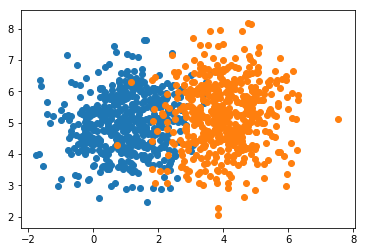

In [8]:
plt.scatter(dist1[:,0], dist1[:,1])
plt.scatter(dist2[:,0], dist2[:,1])

plt.show()

In [10]:
data = np.zeros((1000,3))
data[:500, :2] = dist1 
data[500:, :2] = dist2
data[500:, -1] = 1
print(data.shape)

(1000, 3)


In [11]:
np.random.shuffle(data)
data[:10]

array([[ 0.23067392,  5.30967101,  0.        ],
       [ 3.25838616,  3.06627865,  1.        ],
       [ 1.56100543,  7.62937107,  0.        ],
       [ 7.53625741,  5.13261883,  1.        ],
       [ 3.89911359,  4.84449878,  1.        ],
       [ 3.3916044 ,  5.18946601,  1.        ],
       [-0.14643424,  3.17441186,  0.        ],
       [ 4.8927232 ,  5.16089056,  1.        ],
       [ 0.54417104,  4.61132523,  0.        ],
       [ 2.48948247,  5.58463236,  0.        ]])

In [12]:
split = 700

X_train = data[:split,:2]
X_test = data[split:,:2]

y_train = data[:split, -1]
y_test = data[split:, -1]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 2) (700,)
(300, 2) (300,)


In [21]:
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))

def hypothesis(X, W, b):
    h = (X*W).sum()+b
    return sigmoid(h)

#Binary Cross Entropy

def log_likelihood(X, W, b, y_true):
    total = 0.0
    m = X.shape[0]
    for i in range(m):
        if y_true[i]== 0:
            total+= np.log(1-hypothesis(X[i], W, b))
        else:
            total+= np.log(hypothesis(X[i], W, b))
            
    total /= m
    return total    

In [25]:
def gradient_ascent(X, W, b, y_true, learning_rate=0.1):
    gradW = np.zeros(2)
    gradB = 0.0
    
    m = X.shape[0]
    for i in range(m):
        gradW += (y_true[i]-hypothesis(X[i], W, b)) * (X[i])
        gradB += (y_true[i]-hypothesis(X[i], W, b)) * 1
        
        
    gradW /= m
    gradB /= m
    
    W += learning_rate *gradW
    b += learning_rate * gradB
    
    log_like = log_likelihood(X, W, b, y_true)
    return W,b, log_like

In [26]:
W = np.array([0.5, 0.5])
b = 4.2
log_likes=[]
for i in range(200):
    W, b, logs = gradient_ascent(X_train, W, b, y_train, learning_rate=0.1)
    log_likes.append(logs)
    
print(b)
print(W)

3.167217057991599
[ 2.12774552 -1.59223602]


-0.26575841774020176


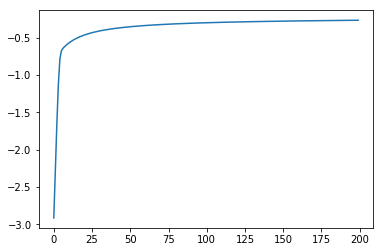

In [27]:
print(log_likes[-1])

plt.plot(log_likes)
plt.show()

In [28]:
def predict(x_sample, W, b):
    conf = hypothesis(x_sample, W, b)
    if conf > 0.5:
        return 1
    else:
        return 0

In [29]:
def score(X_test, y_test, W, b):
    preds = []
    m = X_test.shape[0]
    for i in range(m):
        p = predict(X_test[i],W,b)
        preds.append(p)
    preds = np.asarray(preds)
    return 100 * (preds ==y_test).sum()/m


In [30]:
score(X_test, y_test, W, b)

87.33333333333333

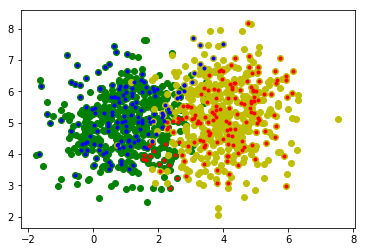

In [31]:
plt.scatter(dist1[:,0], dist1[:,1], color='g')
plt.scatter(dist2[:,0], dist2[:,1],color='y')

m = X_test.shape[0]
for i in range(m):
    x = X_test[i]
    p = predict(x,W,b)
    if p==0:
        plt.plot(x[0],x[1],'b.')
    else:
        plt.plot(x[0],x[1],'r.')
plt.show()